In [ ]:
import numpy as np
import math

# Given data
P_peak = 38.7 #[kW/m] Peak linear power
t_cycle = 360 #[days] Length of cycle
H_column = 850 #[mm] Fuel column height
D_pellet_out = 5.42 #[mm] Fuel pellet outer diameter
H_pellet = 7 #[mm] Fuel pellet height
TD_fuel = 11.31 #[g/cm^3] Fuel theoretical density

# Calculation of burnup
N_pellet = math.floor((H_column/H_pellet)) #[/] Number of pellets per column
V_pellet = np.pi*(D_pellet_out**2)/4*H_pellet #[mm^3] Volume of a single pellet
rho_fuel = 0.945*TD_fuel*1e3 #[kg/m^3] Fuel density %TD
V_fuel = N_pellet*V_pellet*1e-9 #[m^3] Total fuel volume per fuel rod
m_HM = rho_fuel*V_fuel/1000 #[ton-HM] Weight of fuel material per fuel rod

beta = (P_peak/1e6)*(H_column/1000)*t_cycle/m_HM #[GWd/t_HM]

print("Number of pellets per fuel rod:", N_pellet, ".")
print("Volume of pellet:",V_pellet, "[mm^3].")
print("Weight of fuel material per fuel rod:",m_HM, "[ton].")
print("Burnup of fuel:",beta, "[GWd/t-HM].")

Number of pellets per fuel rod: 121 .
Volume of pellet: 161.5051942506016 [mm^3].
Weight of fuel material per fuel rod: 0.0002088652923477768 [ton].
Burnup of fuel: 56.69778768356509 [GWd/t-HM].


[22.1364 28.5219 33.5916 37.0746 38.7    38.0421 35.2944 31.0374 25.4646
 19.2726]
Total power per fuel rod: 26.228790364804333 [kW]


<ipython-input-3-0e3f0e5ee896>:26: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  P_total_rod = simps(P_spline, H_dense/1000) #[kW] Peak linear power


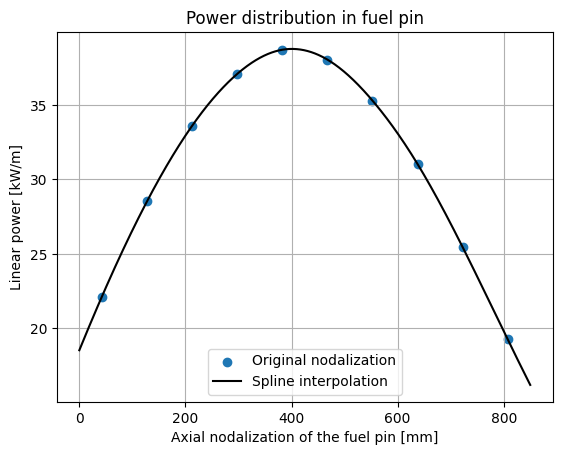

In [ ]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
from scipy.integrate import simps

P_peak = 38.7 #[kW/m] Peak linear power

# Axial nodalization of fuel pin
H_nod = np.array([42.5, 127.5, 212.5, 297.5, 382.5, 467.5, 552.5, 637.5, 722.5, 807.5]) #[mm] Axial nodalization of the fuel pin
P_nod_f = np.array([0.572, 0.737, 0.868, 0.958, 1.000, 0.983, 0.912, 0.802, 0.658, 0.498]) #[/] Peak power factors

# Calculation of linear power along the fuel pin
P_nod = P_peak*P_nod_f #[kW/m] Peak linear power
print(P_nod)

# Spline interpolation with a smoothing factor
spline = UnivariateSpline(H_nod, P_nod, s=0)  # s=0 ensures the spline passes through all points

# Create a denser range of x values for interpolation
H_dense = np.linspace(0, 850, 1000) #[mm] Axial nodalization of the fuel pin

# Get the interpolated values
P_spline = spline(H_dense) #[kW/m] Peak linear power

# Calculate the total power per fuel rod
P_total_rod = simps(P_spline, H_dense/1000) #[kW] Peak linear power
print("Total power per fuel rod:", P_total_rod,'[kW]')

# Create the plot
plt.scatter(H_nod, P_nod, label = 'Original nodalization')
plt.plot(H_dense, P_spline, color='black', linestyle='-', label='Spline interpolation')
plt.legend()
plt.grid(True)

# Add labels and title
plt.xlabel('Axial nodalization of the fuel pin [mm]')
plt.ylabel('Linear power [kW/m]')
plt.title('Power distribution in fuel pin')

# Show the plot
import sympy as sp
plt.show()

In [ ]:
#MASS AND ENERGY BALANCE IN THE COOLANT

import numpy as np

#Cladding Material 15-15, cold worked stainless steel
D_clad_out = 6.55 #[mm] Cladding outer diameter

# Thermo-hydraulic specifications
p = 8.275 #[mm] Pin pitch
T_co_in_C = 395 #[°C] Coolant inlet temperature
T_co_in_K = T_co_in_C + 273.15 #[K] Coolant inlet temperature
T_co_in_F = (T_co_in_C*9/5) + 32 #[°F] Coolant inlet temperature
P_co_in = 0.1 #[MPa] Coolant inlet pressure
m_co_in = 0.049 #[kg/s] Coolant mass flow rate

# Coolant properties
cp_co = 1608 - 0.7481*T_co_in_K + 3292e-4*T_co_in_K**2 #[J/kg-K] Isobaric specific heat of coolant

# Mass-Energy balance in coolant
Q_in = P_total_rod/2 #[kW] Total power to be removed in defined channel
T_co_out_K = Q_in/(m_co_in*cp_co/1000)+T_co_in_K

print('Inlet temperature of coolant:',T_co_in_F,'F')
print('Inlet temperature of coolant:',T_co_in_K,'K')
print('Cp of coolant at inlet temperature:',cp_co, '[J/kg-K]')
print('Total power to be removed by the coolant:',Q_in,'kW')
print('Outlet temperature of coolant:',T_co_out_K,'K')

Inlet temperature of coolant: 743.0 F
Inlet temperature of coolant: 668.15 K
Cp of coolant at inlet temperature: 148071.076872 [J/kg-K]
Total power to be removed by the coolant: 13.114395182402166 kW
Outlet temperature of coolant: 669.957515172187 K


In [ ]:
  # CALCULATION OF EXTERNAL WALL TEMPERATURE OF CLADDING

import numpy as np

# Coolant properties
T_co_melt = 98 #[°C] Melting temperature of coolant at atmosferic pressure
T_co_boil = 882 #[°C] Boiling temperature of coolant at atmosferic pressure
cp_co = 1608 - 0.7481*T_co_in_K + 3292e-4*T_co_in_K**2 #[J/kg-K] Isobaric specific heat of coolant
rho_co = 954.1579 + T_co_in_F*(T_co_in_F*(T_co_in_F*0.9667e-9 -0.46e-5) - 0.1273534) #[kg/m^3] Density of coolant
mu_co = np.exp(813.9/T_co_in_K -2.530) #[mPa-s] Dynamic viscosity of coolant
k_co = 110 - 0.0648*T_co_in_K + 1.16e-5*T_co_in_K**2 #[W/m-K] Thermal conductivity of coolant

# Geometry of channel
A_channel = 3**(1/3)/4*p**2-np.pi*D_clad_out**2/8 #[mm^2] Area channel
P_w = np.pi*D_clad_out/2 #[mm] Wet perimeter
D_h = 4*A_channel/P_w/1000 #[m] Hydraulic diameter of channel

# Calculation of velocity of coolant in channel
volflow_co_in = m_co_in/rho_co #[m^3/s] Volumetric flow of coolant through channel
v_co = volflow_co_in/(A_channel/1e6) #[m/s] Coolant velocity in channel

# Calculation of Reynolds number
Re_co = rho_co*v_co*D_h/(mu_co/1000) #[/]

# Calculation of Prandtl number
Pr_co = (mu_co*1e-3)*cp_co/k_co #[/]

# Calculation of Peclet number
Pe_co = Re_co*Pr_co #[/]

# Calculation of Nusselt number
Nu_co = 7 + 0.025*Pe_co**0.8 #[/]

# Convection heat transfer coefficient

h = Nu_co*k_co/D_h #[W/m^2-K]


print('Heat transfer coeficient of coolant:',h,'[W/m^2-K]')
print(Pe_co)
print('Hydraulic diameter of channel:',D_h,'[m]')




Heat transfer coeficient of coolant: 2953943.5735038724 [W/m^2-K]
39241.22355961108
Hydraulic diameter of channel: 0.00304876249901781 [m]


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `r_eval`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


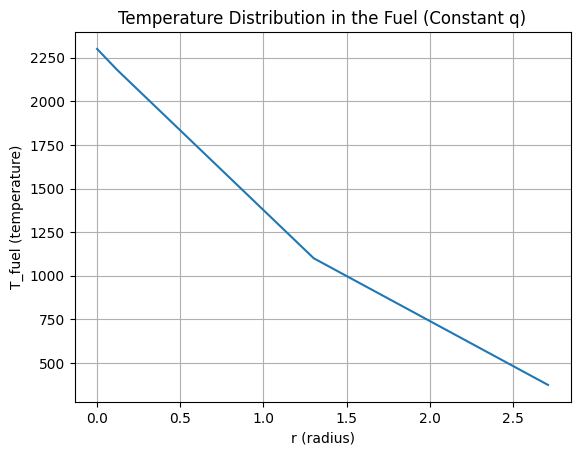

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# TEMPERATURE PROFILES IN FUEL, GAP, CLADDING AND COOLANT

# FUEL TEMPERATURE PROFILE

D_pellet_out = 5.42 #[mm] Fuel pellet outer diameter
q_fuel = (38.7*0.85)/(np.pi*D_pellet_out/1000) #[kW/m^2] Nodalization of heat along the z-axis of the fuel

# Define constants
A = 0.01926 + 1.06e-6*1 + 2.63e-8*1
B = 2.39e-4 + 1.37e-13*1
D = 5.27e9
E = 17109.5
beta = 56 #burnup
p = 0.05 #porosity

# Define functions for A and B
#def A(x):
#    return 0.01926 + 1.06e-6 * x + 2.63e-8

#def B(x):
#    return 2.39e-4 + 1.37e-13

# Define k_fuel as a function of T_fuel
def k_fuel(T_fuel):
    k_0 = (1 / (A + B * T_fuel) + D / (T_fuel**2) * np.exp(-E / T_fuel)) * (1 - p)**2.5
    return 1.755 + (k_0 - 1.755) * np.exp(-beta / 128.75)

# Differential equation: dq/dr = -k_fuel * dT_fuel/dr
def dT_dr(r, T_fuel):
    return -q_fuel / k_fuel(T_fuel)

# Parameters for the problem
#x = 0.01  # Example parameter value for A and B

# Initial condition
T_fuel_0 = 2300  # Example initial temperature at r=0

# Radius range
r_span = (0, D_pellet_out/2)  # From r=0 to r=10

# Solve the ODE numerically
solution = solve_ivp(dT_dr, r_span, [T_fuel_0], r_eval=np.linspace(0, D_pellet_out/2, 100))

# Plot the results
plt.plot(solution.t, solution.y[0])
plt.xlabel('r (radius)')
plt.ylabel('T_fuel (temperature)')
plt.title('Temperature Distribution in the Fuel (Constant q)')
plt.grid(True)
plt.show()
